***13th GEN INTEL PROCESSOR TECHNICAL REVIEWS***

***DATA PREPROCESSING***

In [142]:
import pandas as pd
import numpy as np


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [143]:
dataset = pd.read_csv("13gen_tech.csv")

In [144]:
df = pd.DataFrame(data = dataset)

In [145]:
df.head()

,Rating,Review
0,Positive,The Intel Core i5-13600K offers high performan...
1,Positive,With 14 cores (6 performance and 8 efficiency)...
2,Positive,The i5-13600K's compatibility with the LGA1700...
3,Positive,"Despite being part of the 13th Gen, which is k..."
4,Positive,The processor excels in multitasking and handl...


In [146]:
df.shape

(155, 2)

In [147]:
#REMOVING DUPLICATE ELEMENTS

duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [148]:

df['Review'].fillna('', inplace=True)


df['review_length'] = df['Review'].apply(len)

C:\Users\Snega\AppData\Local\Temp\ipykernel_23628\1549326339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna('', inplace=True)


In [149]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [150]:
df.head()

,Rating,Review,review_length
0,Positive,The Intel Core i5-13600K offers high performan...,161
1,Positive,With 14 cores (6 performance and 8 efficiency)...,176
2,Positive,The i5-13600K's compatibility with the LGA1700...,162
3,Positive,"Despite being part of the 13th Gen, which is k...",169
4,Positive,The processor excels in multitasking and handl...,175


In [151]:
(df['Rating']=='Neutral').sum()

35

In [152]:

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Snega\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [153]:
#TEST PREPROCESSING

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

In [154]:
df.head()

,Rating,Review,review_length
0,Positive,The Intel Core i5-13600K offers high performan...,161
1,Positive,With 14 cores (6 performance and 8 efficiency)...,176
2,Positive,The i5-13600K's compatibility with the LGA1700...,162
3,Positive,"Despite being part of the 13th Gen, which is k...",169
4,Positive,The processor excels in multitasking and handl...,175


In [155]:
preprocessed_text = df['Review'].apply(preprocess_text)

In [156]:
df['Review'] = preprocessed_text

In [157]:
df.head()

,Rating,Review,review_length
0,Positive,intel core ik offer high performance lower cos...,161
1,Positive,core performance efficiency thread cpu handle ...,176
2,Positive,iks compatibility lga socket mean work th gen ...,162
3,Positive,despite part th gen known higher temperature i...,169
4,Positive,processor excels multitasking handle applicati...,175


***EXPLORATORY DATA ANALYSIS***

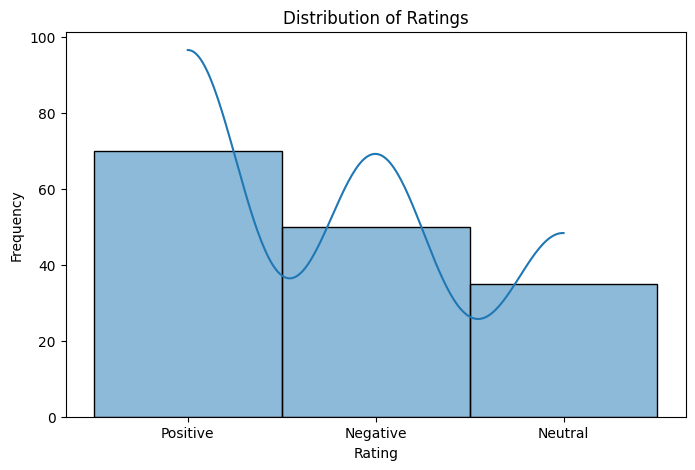

In [158]:
#BAR GRAPH

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True,edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

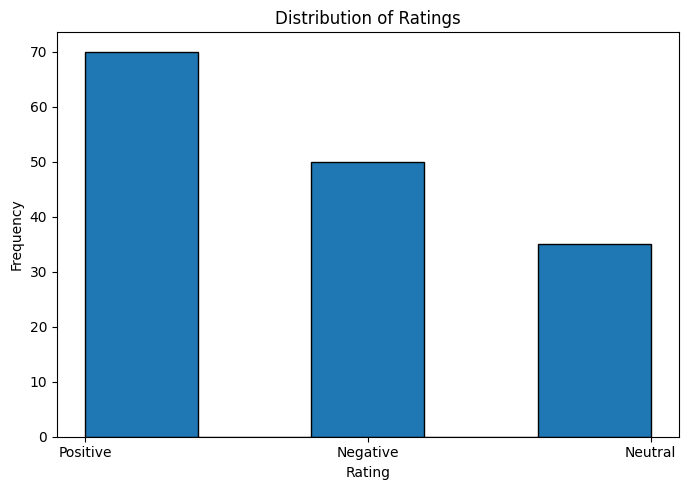

In [159]:
#HISTOGRAM

plt.figure(figsize=(7,5))
plt.hist(df['Rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

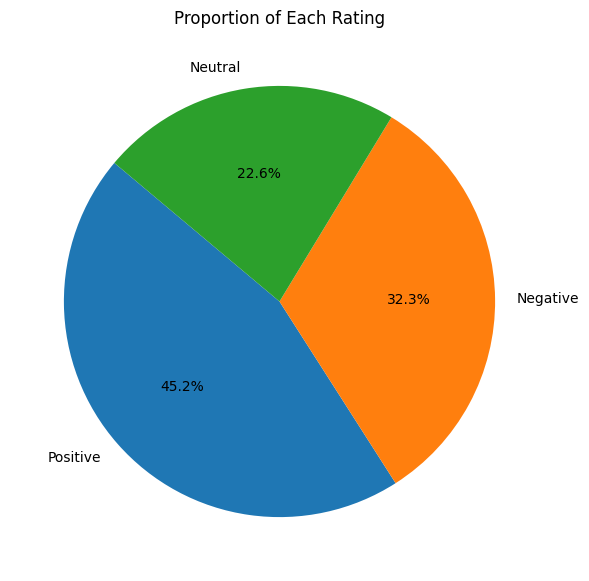

In [160]:
#PIE CHART

rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Rating')
plt.show()

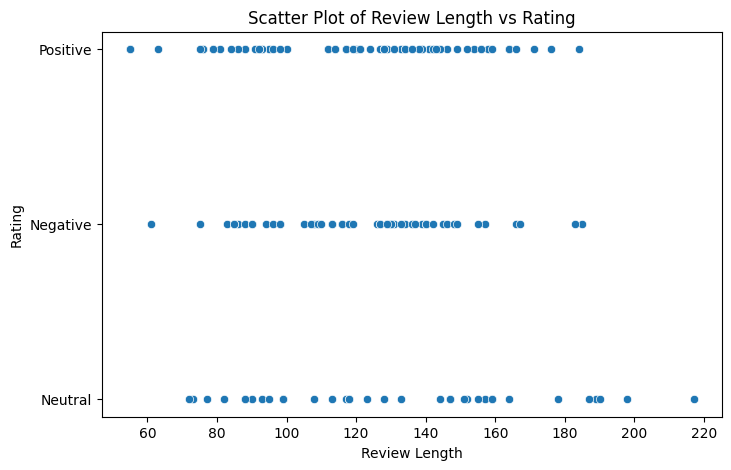

In [161]:
#SCATTER PLOT

df['review_length'] = df['Review'].apply(len)

plt.figure(figsize=(8,5))
sns.scatterplot(x='review_length', y='Rating', data=df)
plt.title('Scatter Plot of Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

***FEATURE EXTRACTION***

In [162]:
#VECTORIZATION

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review'])


df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_matrix)
print(df_tfidf)

  (0, 340)	0.19923810798297314
  (0, 147)	0.1959472202105513
  (0, 311)	0.19923810798297314
  (0, 443)	0.2287208959738938
  (0, 296)	0.2633019657768479
  (0, 481)	0.11200688200739682
  (0, 384)	0.28488943412875256
  (0, 148)	0.2235854962866725
  (0, 111)	0.2102637189514267
  (0, 300)	0.34367703982872855
  (0, 516)	0.19281692888111374
  (0, 370)	0.2235854962866725
  (0, 393)	0.2235854962866725
  (0, 233)	0.34367703982872855
  (0, 696)	0.28488943412875256
  (0, 521)	0.34367703982872855
  (1, 147)	0.19878375005118484
  (1, 481)	0.11362829242000134
  (1, 208)	0.21750811296861808
  (1, 656)	0.2671135221858695
  (1, 153)	0.14180211674544915
  (1, 291)	0.2771467274129294
  (1, 170)	0.2671135221858695
  (1, 719)	0.21750811296861808
  (1, 210)	0.3035372347179896
  :	:
  (153, 452)	0.22976993498088835
  (153, 302)	0.2999090829530551
  (153, 469)	0.2999090829530551
  (153, 698)	0.2999090829530551
  (154, 340)	0.16009962031895023
  (154, 111)	0.1689593517614146
  (154, 114)	0.1689593517614146
  (1

In [163]:
print(df_tfidf.isnull().sum())

ability             0
access              0
accessible          0
accommodating       0
achieve             0
                   ..
workstationclass    0
xd                  0
xe                  0
yearoveryear        0
zenbook             0
Length: 725, dtype: int64


In [164]:
#CALCULATING SENTIMENT SCORE USING VADER
def calculate_sentiment_scores(text):
    
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

In [165]:

df['sentiment_scores'] = df['Review'].apply(calculate_sentiment_scores)

In [166]:

def map_rating_to_sentiment(sentiment_scores):
    if sentiment_scores > 0.5:
        return 1
    elif sentiment_scores < 0:
        return -1
    else:
        return 0


df_tfidf['sentiment'] = df['sentiment_scores'].apply(map_rating_to_sentiment)
df['sentiment'] = df['sentiment_scores'].apply(map_rating_to_sentiment)

In [167]:
print("Number of positive sentiments:", df[df['sentiment'] == 1].shape[0])
print("Number of negative sentiments:", df[df['sentiment'] == -1].shape[0])
print("Number of neutral sentiments:", df[df['sentiment'] == 0].shape[0])

Number of positive sentiments: 75
Number of negative sentiments: 10
Number of neutral sentiments: 70


In [168]:
#UPSAMPLING

from sklearn.utils import resample

df_majority = df[df['sentiment'] == 0]  
df_minority1 = df[df['sentiment'] == 1]
df_minority2 = df[df['sentiment'] == -1]


df_minority1_upsampled = resample(df_minority1, 
                                  replace=True,    
                                  n_samples=len(df_majority),    
                                  random_state=42)  

df_minority2_upsampled = resample(df_minority2, 
                                  replace=True,     
                                  n_samples=len(df_majority),    
                                  random_state=42)


df = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled])


df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [169]:
print("Number of positive sentiments:", df[df['sentiment'] == 1].shape[0])
print("Number of negative sentiments:", df[df['sentiment'] == -1].shape[0])
print("Number of neutral sentiments:", df[df['sentiment'] == 0].shape[0])

Number of positive sentiments: 70
Number of negative sentiments: 70
Number of neutral sentiments: 70


In [170]:
df_tfidf.isnull().sum().sum()

0

In [171]:

df_tfidf.dropna(inplace=True)

In [172]:
df_tfidf.isnull().sum().sum()

0

In [173]:

df_tfidf['sentiment'] = df_tfidf['sentiment'].astype(int)



print(df_tfidf['sentiment'])

0      1
1      1
2      0
3      0
4      1
      ..
150    1
151    1
152    0
153    1
154    0
Name: sentiment, Length: 155, dtype: int32


In [174]:
df_tfidf.head()

,ability,access,accessible,accommodating,achieve,achieves,across,actual,add,adding,...,without,word,work,workload,workstationclass,xd,xe,yearoveryear,zenbook,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.217508,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.212212,0.0,0.27761,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1


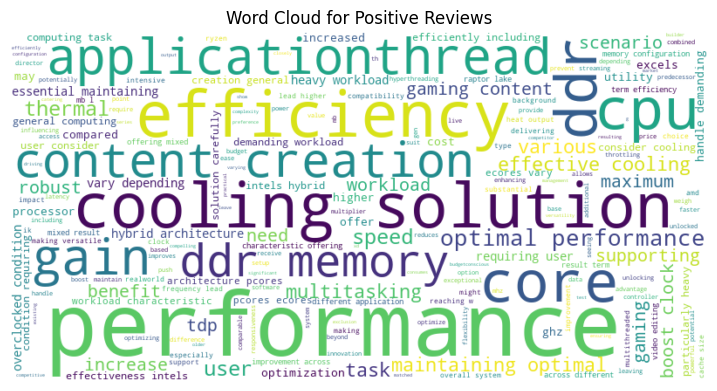

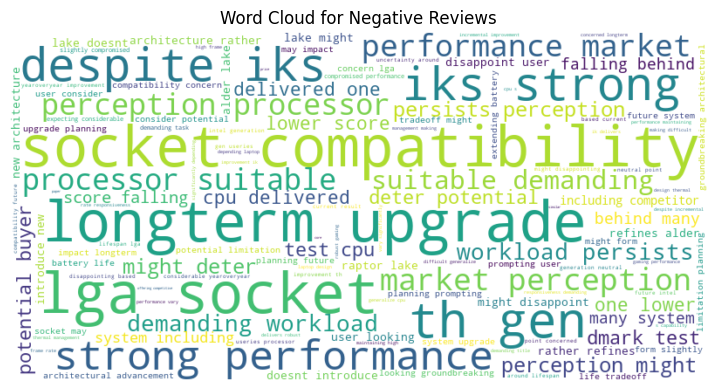

In [175]:
#WORDCLOUD

from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment_scores'] > 0.6]['Review'])
negative_text = ' '.join(df[df['sentiment_scores'] < 0]['Review'])


plt.figure(figsize=(9, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


plt.figure(figsize=(9, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

***MODEL TRAINING AND EVALUATION***

In [176]:
#SPLITTING DATASET INTO TESTING AND TRAINING SETS

from sklearn.model_selection import train_test_split

In [177]:
print(df_tfidf.isnull().sum())

ability          0
access           0
accessible       0
accommodating    0
achieve          0
                ..
xd               0
xe               0
yearoveryear     0
zenbook          0
sentiment        0
Length: 726, dtype: int64


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rating            210 non-null    object 
 1   Review            210 non-null    object 
 2   review_length     210 non-null    int64  
 3   sentiment_scores  210 non-null    float64
 4   sentiment         210 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 8.3+ KB


In [179]:
X = df_tfidf.drop(columns='sentiment')
y = df_tfidf['sentiment']

In [180]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [181]:
print(X_train.shape)
print(y_train.shape)

(116, 725)
(116,)


In [182]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [183]:

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (116, 725)
Shape of X_test: (39, 725)
Shape of y_train: (116,)
Shape of y_test: (39,)


***SUPERVISED***

***SVM ACCURACY-56%***

In [184]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


param_distributions = {
    'C': expon(scale=1.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(expon(scale=0.1).rvs(10)),
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}


svm = SVC()


random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")


best_svm = random_search.best_estimator_


y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 0.4614871275158603, 'coef0': 0.0, 'degree': 4, 'gamma': 0.1482916342719321, 'kernel': 'sigmoid'}
Best cross-validation score: 0.6126811594202899
Test set accuracy: 0.5641025641025641


***LOGISTIC REGRESSION ACCURACY-56%***

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


param_distributions = {
    'penalty': ['l1', 'l2'],  
    'C': uniform(0.001, 100)  
}


logistic_regression = LogisticRegression(solver='liblinear')  


random_search = RandomizedSearchCV(logistic_regression, param_distributions, n_iter=100, cv=10, scoring='accuracy', random_state=42)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = random_search.best_estimator_


test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

c:\Users\Snega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Best Hyperparameters: {'C': 43.19550186421157, 'penalty': 'l1'}
Test Accuracy: 0.5641025641025641


***XGBOOST ACCURACY-58%***

In [186]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


param_distributions = {
    'n_estimators': randint(50, 300),  
    'learning_rate': uniform(0.01, 0.6),  
    'max_depth': randint(3, 10),  
    'subsample': uniform(0.5, 0.5),  
    'colsample_bytree': uniform(0.5, 0.5),  
    'gamma': uniform(0, 5)  
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train_encoded)


best_xgb_model = random_search.best_estimator_


y_pred = best_xgb_model.predict(X_test)


print("Best Parameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))




Best Parameters: {'colsample_bytree': 0.8059264473611898, 'gamma': 0.6974693032602092, 'learning_rate': 0.1852867891211309, 'max_depth': 9, 'n_estimators': 239, 'subsample': 0.5453032172664104}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      0.82      0.65        17
           2       0.75      0.45      0.56        20

    accuracy                           0.59        39
   macro avg       0.43      0.42      0.40        39
weighted avg       0.62      0.59      0.57        39

Accuracy: 0.5897435897435898


***RANDOM FOREST ACCURACY-89%***

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=20)


param_distributions = {
    'n_estimators': [100, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}


random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X, y)

best_rf_model = random_search.best_estimator_

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 20}
Best cross-validation score: 0.5681246857717446
0.8974358974358975


c:\Users\Snega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


***DEEP LEARNING CLASSIFIERS***

***CNN ACCURACY-43%***

In [188]:
import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout


model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=1104))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

c:\Users\Snega\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.4794 - loss: 0.6907 - val_accuracy: 0.4359 - val_loss: 0.6900
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4579 - loss: 0.6766 - val_accuracy: 0.4359 - val_loss: 0.6925
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4713 - loss: 0.6716 - val_accuracy: 0.4359 - val_loss: 0.6935
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4389 - loss: 0.6752 - val_accuracy: 0.4359 - val_loss: 0.6928
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4603 - loss: 0.6768 - val_accuracy: 0.4359 - val_loss: 0.6941
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4646 - loss: 0.6832 - val_accuracy: 0.4359 - val_loss: 0.6932
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4713 - loss: 0.6677 - val_accuracy: 0.4359 - val_loss: 0.6898
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4489 - loss: 0.6865 - val_accuracy: 0.4359 - val_loss:

***LSTM ACCURACY-43%***

In [189]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


max_words = 1000
max_len = 20
tokenizer = Tokenizer(num_words=max_words)


model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10


c:\Users\Snega\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.4141 - loss: 0.6914 - val_accuracy: 0.4359 - val_loss: 0.6900
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.4442 - loss: 0.6845 - val_accuracy: 0.4359 - val_loss: 0.6905
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.4786 - loss: 0.6717 - val_accuracy: 0.4359 - val_loss: 0.6961
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.4307 - loss: 0.6868 - val_accuracy: 0.4359 - val_loss: 0.6967
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.4161 - loss: 0.6805 - val_accuracy: 0.4359 - val_loss: 0.6978
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.4703 - loss: 0.6872 - val_accuracy: 0.4359 - val_loss: 0.6997
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.4734 - loss: 0.6730 - val_accuracy: 0.4359 - val_loss: 0.6985
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.4484 - loss: 0.6783 - val_accuracy: 0.4359 - val_loss: 0.6957
Epo

***UNSUPERVISED***

***K-MEANS***

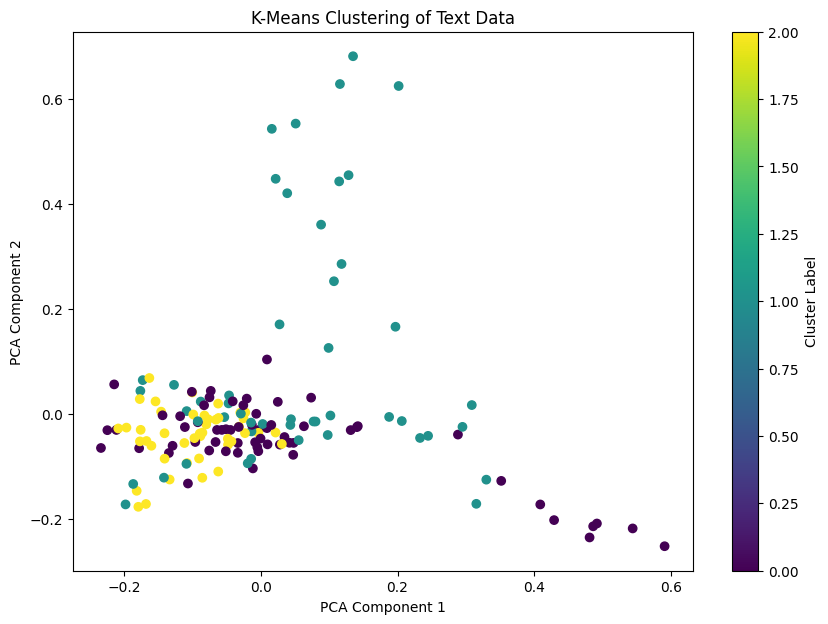

In [190]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


clusters = kmeans.labels_


pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X)


plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering of Text Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()




***HIERARCHY CLUSTERING***

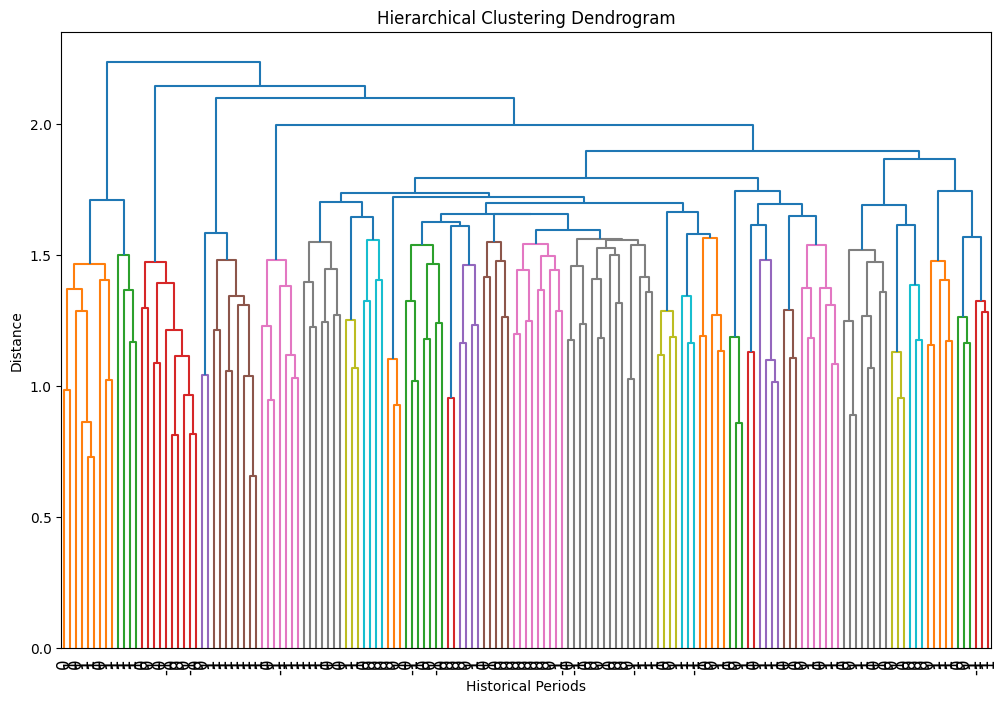

In [191]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


cosine_similarities = cosine_similarity(X)


Z = linkage(cosine_similarities, method='complete')


plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df_tfidf['sentiment'].tolist(), orientation='top', leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Historical Periods')
plt.ylabel('Distance')
plt.show()


***UPON INVESTIGATING, RANDOM FOREST HAS THE HIGHEST ACCURACY-89%***